# EDA of Titanic Survived People

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np 
from sklearn.metrics import RocCurveDisplay

#Load data and check missing values
data=pd.read_csv("Titanic.csv")
print(data.isna().sum())

#Fill missing Values
data['Age']=data['Age'].fillna(data['Age'].median())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

#drop column having too many missing values
data.drop(columns='Cabin',inplace=True)
data.to_csv('titanic_cleaned.csv',index=False)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [23]:
#Converting data types
data=data.convert_dtypes()

data['Sex']=data['Sex'].astype('category')
data['Embarked']=data['Embarked'].astype('category')

data['Sex']=data['Sex'].map({'male':0,'female':1})
data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2})

print(data.dtypes)


PassengerId             Int64
Survived                Int64
Pclass                  Int64
Name           string[python]
Sex                  category
Age                   Float64
SibSp                   Int64
Parch                   Int64
Ticket         string[python]
Fare                  Float64
Embarked             category
dtype: object


In [24]:
#Group Based Insigts
print(data.describe())

       PassengerId  Survived    Pclass        Age     SibSp     Parch  \
count        891.0     891.0     891.0      891.0     891.0     891.0   
mean         446.0  0.383838  2.308642  29.361582  0.523008  0.381594   
std     257.353842  0.486592  0.836071  13.019697  1.102743  0.806057   
min            1.0       0.0       1.0       0.42       0.0       0.0   
25%          223.5       0.0       2.0       22.0       0.0       0.0   
50%          446.0       0.0       3.0       28.0       0.0       0.0   
75%          668.5       1.0       3.0       35.0       1.0       0.0   
max          891.0       1.0       3.0       80.0       8.0       6.0   

            Fare  
count      891.0  
mean   32.204208  
std    49.693429  
min          0.0  
25%       7.9104  
50%      14.4542  
75%         31.0  
max     512.3292  


In [25]:
#some statitical analysis
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: Int64

In [26]:
print(data.groupby('Sex',observed=True)['Survived'].mean())
print(data.groupby('Pclass',observed=True)['Survived'].mean())
print(data.groupby(['Sex','Age'],observed=True)['Survived'].mean())

Sex
1    0.742038
0    0.188908
Name: Survived, dtype: Float64
Pclass
1     0.62963
2    0.472826
3    0.242363
Name: Survived, dtype: Float64
Sex  Age 
1    0.75         1.0
     1.0          1.0
     2.0     0.333333
     3.0          0.5
     4.0          1.0
               ...   
0    70.0         0.0
     70.5         0.0
     71.0         0.0
     74.0         0.0
     80.0         1.0
Name: Survived, Length: 145, dtype: Float64


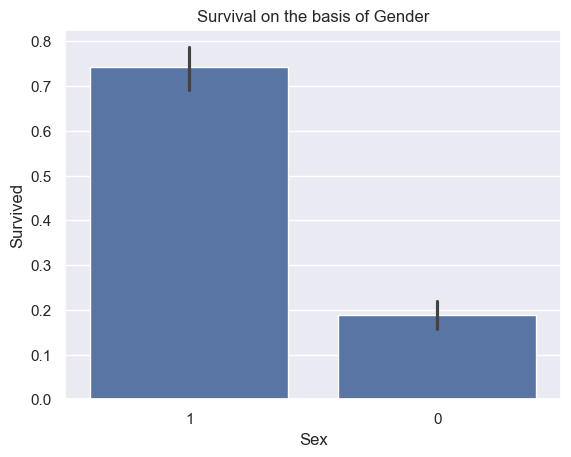

In [27]:
#Visualization
sns.barplot(x='Sex',y='Survived',data=data)
plt.title("Survival on the basis of Gender")
plt.show()

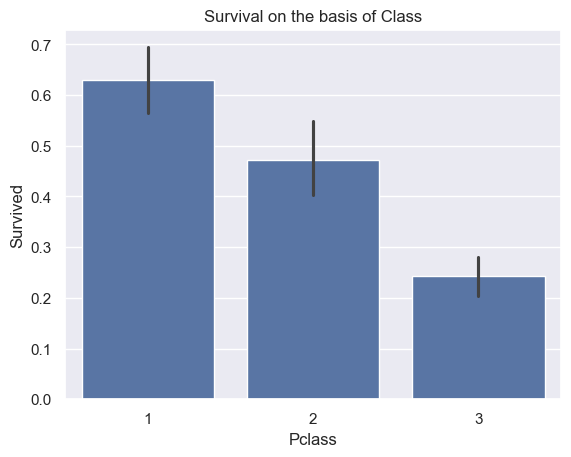

In [28]:
sns.barplot(x='Pclass',y='Survived',data=data)
plt.title("Survival on the basis of Class")
plt.show()

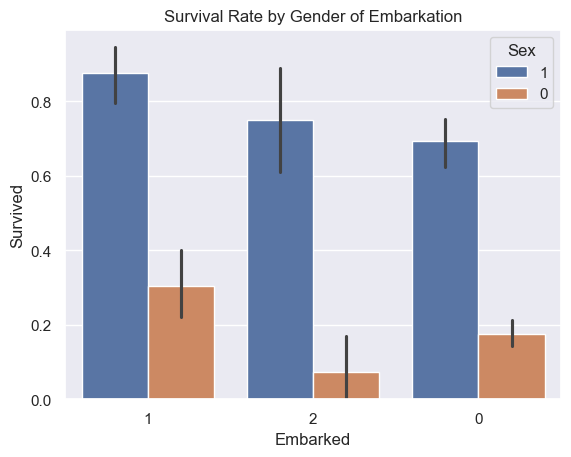

In [29]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=data)
plt.title("Survival Rate by Gender of Embarkation")
plt.show()

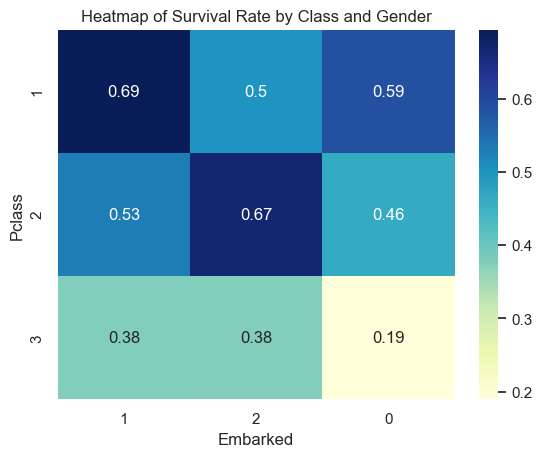

In [30]:
# Heatmap of pivot table
pivot = pd.pivot_table(data, values='Survived', index='Pclass', columns='Embarked', observed=True)
sns.heatmap(pivot.astype(float), annot=True, cmap='YlGnBu')
plt.title("Heatmap of Survival Rate by Class and Gender")
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

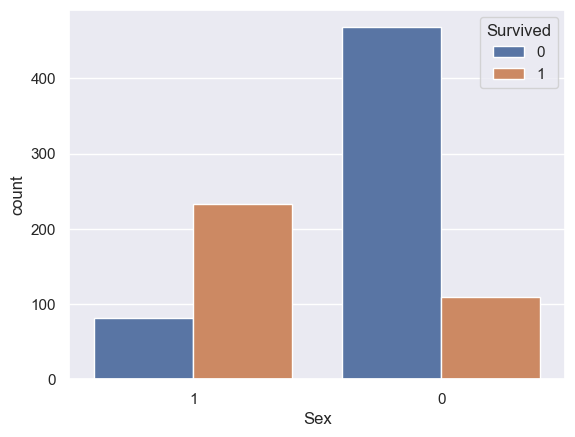

In [31]:
sns.set()
sns.countplot(x='Sex',hue='Survived',data=data)

<Axes: xlabel='Pclass', ylabel='count'>

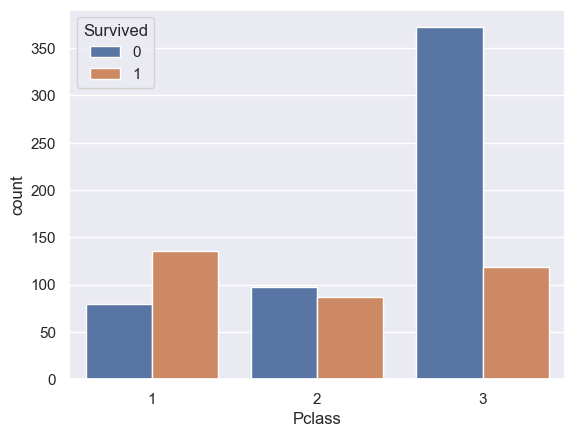

In [32]:
sns.set()
sns.countplot(x='Pclass',hue='Survived',data=data)

# Classification using Linear Regression

In [33]:
Y=data['Survived']
X=data.drop(columns= ['PassengerId','Name','Ticket','Survived'],axis=1)


In [34]:
# splitting data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


In [35]:
#model training
model= LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [36]:
#accuracy
X_train_prediction=model.predict(X_train)
print(X_train_prediction)

[0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.

In [37]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("Accuracy of trainig data: ",training_data_accuracy)


Accuracy of trainig data:  0.8089887640449438


In [38]:
X_test_prediction=model.predict(X_test)
print(X_test_prediction)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


In [39]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("Accuracy of testing data: ",test_data_accuracy)


Accuracy of testing data:  0.7821229050279329


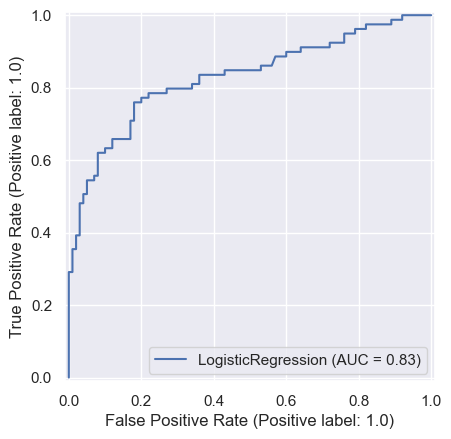

In [40]:
# Example: Select multiple features
features = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
X = data[features]
RocCurveDisplay.from_estimator(model, X_test, Y_test)
plt.show()